<a href="https://colab.research.google.com/github/OnyxDude/Machine-Learning-with-python/blob/main/Phase_4_Data_modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_excel('data.xlsx')

In [ ]:
df = df.iloc[:, 3:9]

In [ ]:
print("Null values before cleanup:")
print(df.isnull().sum())
df = df.dropna()
print("Null values after cleanup:")
print(df.isnull().sum())

Null values before cleanup:
Cost             15
Budget           15
Time invested    15
Type             15
Moment           15
No. of people    15
dtype: int64
Null values after cleanup:
Cost             0
Budget           0
Time invested    0
Type             0
Moment           0
No. of people    0
dtype: int64


In [ ]:
x = df[['Budget', 'Time invested', 'Type', 'Moment', 'No. of people']].values
y = df['Cost'].values

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [ ]:
y_test

array([ 800.,    0.,   50.,   30.,  100.,   50.,    0.,  800., 1000.,
        600.,  800.,  250.,  200.,  800.,   50.,   50.,   50.,    0.,
        400.,  200.,  800.,  500.,  150.,  200.,  200.,  800.,  100.,
        150.,  150.,    0.,    0.,   50., 2000.,  300.,  200.,  800.,
          0.,  150.,   60.,  600.,    0.,  400.,   50.,  150.,   50.,
        800.,  300.,  200.,    0.,    0.,   40.,   30.,  300.,  200.,
       1000.,  200.,  200.])

In [ ]:
model_regression = LinearRegression()
model_regression.fit(x_train, y_train)

LinearRegression()

In [ ]:
x_labels = ['Budget', 'Time invested', 'Type', 'Moment', 'No. of people']
c_label = ['Coefficients']
coeff_df = pd.DataFrame(model_regression.coef_, x_labels, c_label)
print("Coefficients:")
print(coeff_df)

Coefficients:
               Coefficients
Budget             0.926667
Time invested     -0.199501
Type              -4.567085
Moment            -8.525635
No. of people      0.509021


In [ ]:
y_pred = model_regression.predict(x_test)

In [ ]:
residuals = pd.DataFrame({'Real': y_test, 'Prediction': y_pred, 'Residual': y_test - y_pred})
residuals = residuals.sample(n = 30)
residuals = residuals.sort_values(by='Real')
residuals

,Real,Prediction,Residual
30,0.0,-17.961356,17.961356
29,0.0,-17.961356,17.961356
40,0.0,-12.584849,12.584849
48,0.0,-8.974201,8.974201
6,0.0,-17.961356,17.961356
51,30.0,33.348563,-3.348563
16,50.0,77.245892,-27.245892
2,50.0,69.229278,-19.229278
14,50.0,69.229278,-19.229278
31,50.0,91.819524,-41.819524


In [ ]:
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2}")

R2 Score: 0.985204719269636


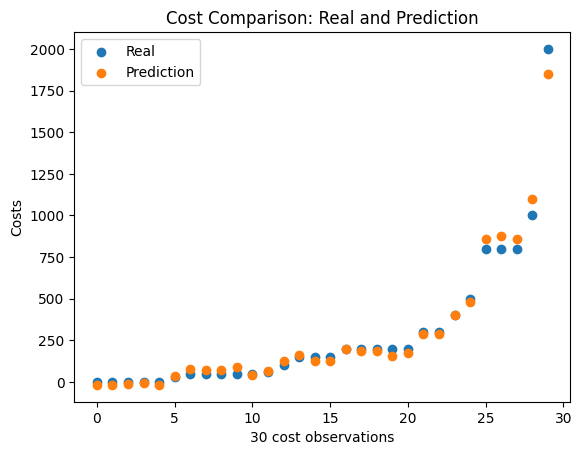

In [ ]:
%matplotlib inline
plt.scatter(np.arange(30), residuals['Real'], label = "Real")
plt.scatter(np.arange(30), residuals['Prediction'], label = "Prediction")

plt.title("Cost Comparison: Real and Prediction")
plt.xlabel("30 cost observations")
plt.ylabel("Costs")
plt.legend(loc='upper left')

plt.show()

In [ ]:
# 1. Number of daily activities recorded
summary_stats = df.describe()

count_activities = summary_stats.loc['count', 'Budget']

print("Total activities recorded:",count_activities)

Total activities recorded: 300.0


In [ ]:
# 2. Minimum and maximum budget
min_budget = summary_stats.loc['min', 'Budget']
max_budget = summary_stats.loc['max', 'Budget']

print("Minimum budget:", min_budget)
print("Maximum budget:", max_budget)

Minimum budget: 0.0
Maximum budget: 5000.0


In [ ]:
# 3. Type of activity with the most and least spending
activity_spending = df.groupby('Type')['Cost'].sum()
most_spent_activity = activity_spending.idxmax()
least_spent_activity = activity_spending.idxmin()

print("Most spent activity:", most_spent_activity)
print("Least spent activity:", least_spent_activity)

Most spent activity: 4
Least spent activity: 5


In [ ]:
# 4. Number of days expenses recorded
days_recorded = df['Date (dd/mm/yy)'].nunique()

print("Number of days recorded:", days_recorded)

Number of days recorded: 91


In [ ]:
# 5. Total expenses
total_expenses = df['Cost'].sum()

print("Total expenses:", total_expenses)

Total expenses: 74410


In [ ]:
# 6. Total savings
total_savings = df['Budget'].sum() -total_expenses

print("Total savings:", total_savings)

Total savings: 18700


In [ ]:
# 7. Average daily savings
average_daily_savings = total_savings / days_recorded
wishlist_item_cost = 1000
days_to_wishlist_item = wishlist_item_cost / average_daily_savings
print("Days to save for wishlist item:", days_to_wishlist_item)

Days to save for wishlist item: 4.866310160427807
